# Equipo: 3
# Grupo: 002, Miércoles
## Integrantes: 
- 1941502 Vidal Mosqueda Cristina
- 1811901 García Salazar Orlando
- 1644680 Macías Cortés Isaí Adriel
- 1849522 Mora Martínez Gerardo

## Base de datos Principal
- "US Consumer Finance Complaints"
- Url: https://www.kaggle.com/cfpb/us-consumer-finance-complaints

## Base de datos Secundaria
- "Suicides in India"
- https://www.kaggle.com/rajanand/suicides-in-india


# Base Principal

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Lectura de archivo
df = pd.read_csv("consumer_complaints.csv",encoding='utf8')

C:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Una vez importada la base, mostraremos la matriz de nuestra base de datos para analizar las columnas y nos deshacemos de los datos que consideramos irrelevantes al análisis. También cambiaremos los nombres de varias columnas para facilitar su entendimiento.

In [3]:
#Mostramos los primeros 5 datos de la base original
df.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [4]:
#Columnas innecesarias
aux = df.drop(['sub_product','sub_issue','consumer_complaint_narrative','company_public_response','zipcode','tags','consumer_consent_provided','complaint_id'],axis = 1)

#Cambiamos los nombres de las columnas
aux = aux.rename(columns = {'date_received':'Fecha_Enviada_por_el_Cliente'})
aux = aux.rename(columns = {'product':'Producto_Financiero'})
aux = aux.rename(columns = {'issue':'Queja'})
aux = aux.rename(columns = {'company':'Banco'})
aux = aux.rename(columns = {'state':'Diminutivo_de_Estado_de_USA'})
aux = aux.rename(columns = {'submitted_via':'Medio_de_Envío'})
aux = aux.rename(columns = {'date_sent_to_company':'Fecha_Recibida_al_Banco'})
aux = aux.rename(columns = {'timely_response':'¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?'})
aux = aux.rename(columns = {'consumer_disputed?':'¿Cliente_sastifecho_a_la_solución?'})

aux.head()

,Fecha_Enviada_por_el_Cliente,Producto_Financiero,Queja,Banco,Diminutivo_de_Estado_de_USA,Medio_de_Envío,Fecha_Recibida_al_Banco,company_response_to_consumer,¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?,¿Cliente_sastifecho_a_la_solución?
0,08/30/2013,Mortgage,"Loan modification,collection,foreclosure",U.S. Bancorp,CA,Referral,09/03/2013,Closed with explanation,Yes,Yes
1,08/30/2013,Mortgage,"Loan servicing, payments, escrow account",Wells Fargo & Company,CA,Referral,09/03/2013,Closed with explanation,Yes,Yes
2,08/30/2013,Credit reporting,Incorrect information on credit report,Wells Fargo & Company,NY,Postal mail,09/18/2013,Closed with explanation,Yes,No
3,08/30/2013,Student loan,Repaying your loan,"Navient Solutions, Inc.",MD,Email,08/30/2013,Closed with explanation,Yes,Yes
4,08/30/2013,Debt collection,False statements or representation,Resurgent Capital Services L.P.,GA,Web,08/30/2013,Closed with explanation,Yes,Yes


Ahora verificaremos si la columnas de la matriz muestra datos nulos.

In [5]:
aux.isnull().any()

Fecha_Enviada_por_el_Cliente                     False
Producto_Financiero                              False
Queja                                            False
Banco                                            False
Diminutivo_de_Estado_de_USA                       True
Medio_de_Envío                                   False
Fecha_Recibida_al_Banco                          False
company_response_to_consumer                     False
¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?    False
¿Cliente_sastifecho_a_la_solución?               False
dtype: bool

Analizando el resultando anterior, podemos apreciar que la columna de los estados muestran datos nulos, por lo que tendremos que quitar aquellas filas con este dato nulo para obtener una base de datos limpia.

In [6]:
#Tamaño de la base primaria
aux

,Fecha_Enviada_por_el_Cliente,Producto_Financiero,Queja,Banco,Diminutivo_de_Estado_de_USA,Medio_de_Envío,Fecha_Recibida_al_Banco,company_response_to_consumer,¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?,¿Cliente_sastifecho_a_la_solución?
0,08/30/2013,Mortgage,"Loan modification,collection,foreclosure",U.S. Bancorp,CA,Referral,09/03/2013,Closed with explanation,Yes,Yes
1,08/30/2013,Mortgage,"Loan servicing, payments, escrow account",Wells Fargo & Company,CA,Referral,09/03/2013,Closed with explanation,Yes,Yes
2,08/30/2013,Credit reporting,Incorrect information on credit report,Wells Fargo & Company,NY,Postal mail,09/18/2013,Closed with explanation,Yes,No
3,08/30/2013,Student loan,Repaying your loan,"Navient Solutions, Inc.",MD,Email,08/30/2013,Closed with explanation,Yes,Yes
4,08/30/2013,Debt collection,False statements or representation,Resurgent Capital Services L.P.,GA,Web,08/30/2013,Closed with explanation,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
555952,07/01/2014,Mortgage,"Loan modification,collection,foreclosure",Bank of America,NaN,Referral,07/07/2014,Closed with explanation,Yes,No
555953,07/01/2014,Mortgage,"Loan servicing, payments, escrow account",Residential Credit Solutions,NaN,Referral,07/23/2014,Closed with explanation,No,No
555954,07/10/2012,Mortgage,"Loan modification,collection,foreclosure",BB&T Financial,NaN,Phone,11/18/2013,Closed with explanation,Yes,No
555955,04/14/2015,Debt collection,Communication tactics,Global Recovery Group,NaN,Phone,04/14/2015,Untimely response,No,No


In [7]:
#Quitamos las filas con nulos
baselimp = aux.dropna()

#Tamaño de la base final
baselimp

,Fecha_Enviada_por_el_Cliente,Producto_Financiero,Queja,Banco,Diminutivo_de_Estado_de_USA,Medio_de_Envío,Fecha_Recibida_al_Banco,company_response_to_consumer,¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?,¿Cliente_sastifecho_a_la_solución?
0,08/30/2013,Mortgage,"Loan modification,collection,foreclosure",U.S. Bancorp,CA,Referral,09/03/2013,Closed with explanation,Yes,Yes
1,08/30/2013,Mortgage,"Loan servicing, payments, escrow account",Wells Fargo & Company,CA,Referral,09/03/2013,Closed with explanation,Yes,Yes
2,08/30/2013,Credit reporting,Incorrect information on credit report,Wells Fargo & Company,NY,Postal mail,09/18/2013,Closed with explanation,Yes,No
3,08/30/2013,Student loan,Repaying your loan,"Navient Solutions, Inc.",MD,Email,08/30/2013,Closed with explanation,Yes,Yes
4,08/30/2013,Debt collection,False statements or representation,Resurgent Capital Services L.P.,GA,Web,08/30/2013,Closed with explanation,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
553092,03/23/2016,Mortgage,"Loan modification,collection,foreclosure",Bank of America,NJ,Web,03/31/2016,In progress,Yes,No
553093,03/31/2016,Mortgage,"Loan modification,collection,foreclosure",U.S. Bancorp,OH,Referral,04/04/2016,Closed with explanation,Yes,No
553094,03/08/2016,Mortgage,"Loan servicing, payments, escrow account",Dovenmuehle Mortgage Inc.,CO,Web,03/08/2016,Closed with explanation,Yes,No
553095,03/28/2016,Mortgage,"Loan servicing, payments, escrow account",Wells Fargo & Company,PA,Referral,03/31/2016,Closed with explanation,Yes,No


Al haber quitado las filas que contenían nulos, siendo estos una cantidad de 4,887 registros, los cuales representan 0.87% del total de los registros de nuestra base de datos, por lo que no genera cambios significativos en el análisis.

# Estadística Básica

A continuación haremos uso de las funciones estadísticas básicas de python para explorar la base de datos.

Empezaremos por obtener el producto con mayor número de quejas en USA y el menor de ellos.

In [8]:
from collections import Counter
import operator as op
ps = Counter(baselimp['Producto_Financiero'])
pi = dict(ps)

maxi= max(pi.items(),key = op.itemgetter(1))
mini=min(pi.items(),key = op.itemgetter(1))

print("Máximo: %s\nMínimo: %s" % (maxi,mini))

Máximo: ('Mortgage', 185187)
Mínimo: ('Other financial service', 542)


Luego, podemos analizar el tiempo de respuesta del banco a la queja del cliente (para realizar esto se debió de agregar una columna extra a la matriz para poder realizar el análisis).

- Nota: Se considera "Fecha_Recibida_al_Banco" como fecha en la que se resolvió la queja, ya que consideramos que el tiempo para atender la queja al cliente es de 24 hrs.

In [9]:
from datetime import datetime, timedelta
#Se corre una vez estas 2 líneas para convertir de tipo objeto a fecha
#baselimp['Fecha_Recibida_al_Banco'] = baselimp['Fecha_Recibida_al_Banco'].apply(lambda _ : datetime.strptime(_,"%m/%d/%Y"))
#baselimp['Fecha_Enviada_por_el_Cliente'] = baselimp['Fecha_Enviada_por_el_Cliente'].apply(lambda _ : datetime.strptime(_,"%m/%d/%Y"))

baselimp['Diferencia de Tiempo'] = baselimp['Fecha_Recibida_al_Banco'].sub(baselimp['Fecha_Enviada_por_el_Cliente'], axis=0)
baselimp['Diferencia de Tiempo'] = baselimp['Diferencia de Tiempo'] / np.timedelta64(1, 'D') 
baselimp

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_11900/2756696006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baselimp['Fecha_Recibida_al_Banco'] = baselimp['Fecha_Recibida_al_Banco'].apply(lambda _ : datetime.strptime(_,"%m/%d/%Y"))
C:\Users\LENOVO\AppData\Local\Temp/ipykernel_11900/2756696006.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baselimp['Fecha_Enviada_por_el_Cliente'] = baselimp['Fecha_Enviada_por_el_Cliente'].apply(lambda _ : datetime.strptime(_,"%m/%d/%Y"))
C:\Users\LENOVO\AppData\Lo

,Fecha_Enviada_por_el_Cliente,Producto_Financiero,Queja,Banco,Diminutivo_de_Estado_de_USA,Medio_de_Envío,Fecha_Recibida_al_Banco,company_response_to_consumer,¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?,¿Cliente_sastifecho_a_la_solución?,Diferencia de Tiempo
0,2013-08-30,Mortgage,"Loan modification,collection,foreclosure",U.S. Bancorp,CA,Referral,2013-09-03,Closed with explanation,Yes,Yes,4.0
1,2013-08-30,Mortgage,"Loan servicing, payments, escrow account",Wells Fargo & Company,CA,Referral,2013-09-03,Closed with explanation,Yes,Yes,4.0
2,2013-08-30,Credit reporting,Incorrect information on credit report,Wells Fargo & Company,NY,Postal mail,2013-09-18,Closed with explanation,Yes,No,19.0
3,2013-08-30,Student loan,Repaying your loan,"Navient Solutions, Inc.",MD,Email,2013-08-30,Closed with explanation,Yes,Yes,0.0
4,2013-08-30,Debt collection,False statements or representation,Resurgent Capital Services L.P.,GA,Web,2013-08-30,Closed with explanation,Yes,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...
553092,2016-03-23,Mortgage,"Loan modification,collection,foreclosure",Bank of America,NJ,Web,2016-03-31,In progress,Yes,No,8.0
553093,2016-03-31,Mortgage,"Loan modification,collection,foreclosure",U.S. Bancorp,OH,Referral,2016-04-04,Closed with explanation,Yes,No,4.0
553094,2016-03-08,Mortgage,"Loan servicing, payments, escrow account",Dovenmuehle Mortgage Inc.,CO,Web,2016-03-08,Closed with explanation,Yes,No,0.0
553095,2016-03-28,Mortgage,"Loan servicing, payments, escrow account",Wells Fargo & Company,PA,Referral,2016-03-31,Closed with explanation,Yes,No,3.0


In [10]:
baselimp['Diferencia de Tiempo'].describe()

count    551070.000000
mean          4.647010
std          17.184817
min          -1.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         993.000000
Name: Diferencia de Tiempo, dtype: float64

Observando el resultado anterior, nos damos cuenta que el mínimo de la diferencia de tiempo es -1, este resultado es irreal, por lo que la base de datos presenta errores tanto en la fecha de envío de la que queja por el cliente y la fecha recibida al banco, por lo que procederemos a contabilizar los "-1" para quitarlos de la base.

In [11]:
d=baselimp[baselimp['Diferencia de Tiempo'] == -1].count()
print("Cantidad de diferencias de tiempo igual a -1: %d" % (d[1]))

Cantidad de diferencias de tiempo igual a -1: 7042


Se contabilizan 7042 registros, lo consideros datos no significativos de la base de datos.

In [12]:
baselimp = baselimp.drop(baselimp[baselimp['Diferencia de Tiempo']==-1].index)
baselimp

,Fecha_Enviada_por_el_Cliente,Producto_Financiero,Queja,Banco,Diminutivo_de_Estado_de_USA,Medio_de_Envío,Fecha_Recibida_al_Banco,company_response_to_consumer,¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?,¿Cliente_sastifecho_a_la_solución?,Diferencia de Tiempo
0,2013-08-30,Mortgage,"Loan modification,collection,foreclosure",U.S. Bancorp,CA,Referral,2013-09-03,Closed with explanation,Yes,Yes,4.0
1,2013-08-30,Mortgage,"Loan servicing, payments, escrow account",Wells Fargo & Company,CA,Referral,2013-09-03,Closed with explanation,Yes,Yes,4.0
2,2013-08-30,Credit reporting,Incorrect information on credit report,Wells Fargo & Company,NY,Postal mail,2013-09-18,Closed with explanation,Yes,No,19.0
3,2013-08-30,Student loan,Repaying your loan,"Navient Solutions, Inc.",MD,Email,2013-08-30,Closed with explanation,Yes,Yes,0.0
4,2013-08-30,Debt collection,False statements or representation,Resurgent Capital Services L.P.,GA,Web,2013-08-30,Closed with explanation,Yes,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...
553092,2016-03-23,Mortgage,"Loan modification,collection,foreclosure",Bank of America,NJ,Web,2016-03-31,In progress,Yes,No,8.0
553093,2016-03-31,Mortgage,"Loan modification,collection,foreclosure",U.S. Bancorp,OH,Referral,2016-04-04,Closed with explanation,Yes,No,4.0
553094,2016-03-08,Mortgage,"Loan servicing, payments, escrow account",Dovenmuehle Mortgage Inc.,CO,Web,2016-03-08,Closed with explanation,Yes,No,0.0
553095,2016-03-28,Mortgage,"Loan servicing, payments, escrow account",Wells Fargo & Company,PA,Referral,2016-03-31,Closed with explanation,Yes,No,3.0


Una vez ya eliminado estos registros, procedemos a volver a imprimir:

In [13]:
baselimp['Diferencia de Tiempo'].describe()

count    544028.000000
mean          4.720106
std          17.283590
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         993.000000
Name: Diferencia de Tiempo, dtype: float64

# Gráficas

Explicaremos el porqué no se puede graficar las siguientes variables de la base:
- Queja: Columna de comentarios individuales de los clientes
- Banco: Se puede graficar, pero hay 3,605 bancos, por lo que es complicado realizar una visualización de la cantidad de quejas por banco
- Fecha_Recibida_al_Banco: Columna de Fechas

Ahora haremos unas gráficas para analizar mejor nuestros registros de la base de datos.

Text(-15.199999999999996, 0.5, 'Número de quejas')

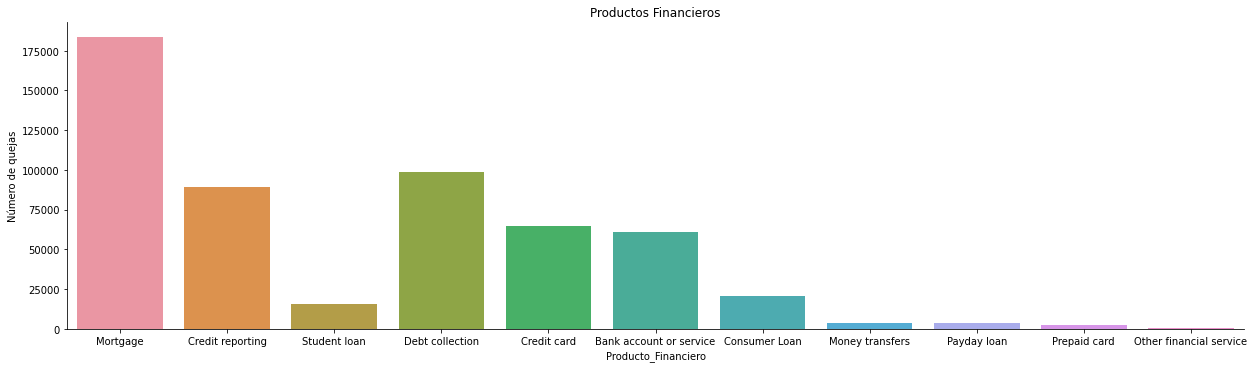

In [14]:
sns.catplot(x="Producto_Financiero", kind="count", data=baselimp, aspect= 3.5)
plt.title("Productos Financieros")
plt.ylabel("Número de quejas")

En la gráfica de barras anterior, podemos apreciar que la mayor cantidad de quejas dadas por los clientes es de "Mortgage" (Hipoteca), la más baja es "Other financial service" (Otros servicios financieros).

<AxesSubplot:xlabel='Fecha_Enviada_por_el_Cliente', ylabel='Density'>

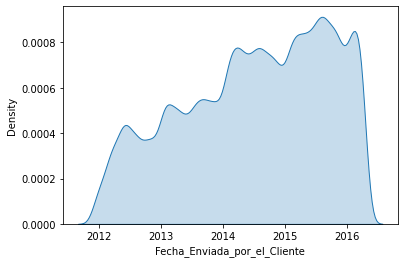

In [15]:
sns.kdeplot(data=baselimp['Fecha_Enviada_por_el_Cliente'], shade=True)

De la gráfica anterior, podemos visualizar que las quejas enviadas por los clientes han ido aumentando conforme pasa el tiempo (a partir del año del 2016 baja dada la poca cantidad de datos de ese periodo).

Text(-8.699999999999996, 0.5, 'Número de quejas')

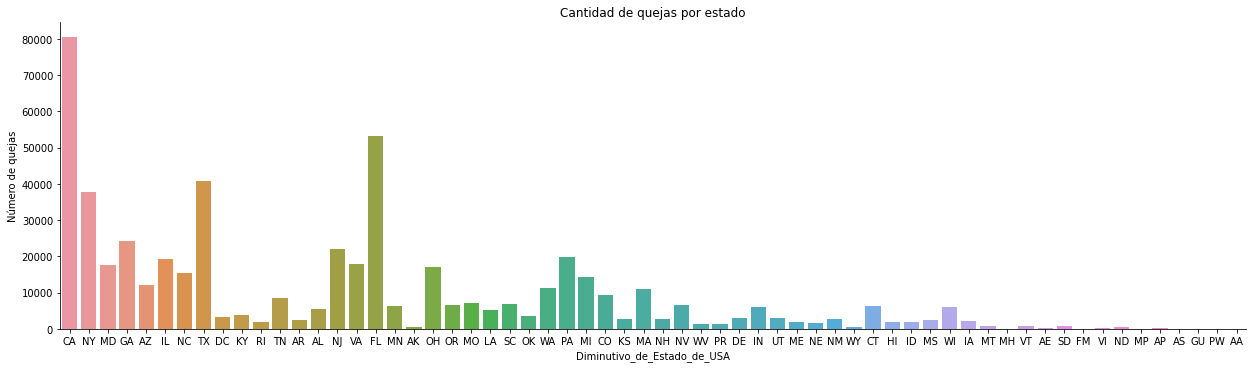

In [16]:
sns.catplot(x="Diminutivo_de_Estado_de_USA", kind="count", data=baselimp, aspect= 3.5)
plt.title("Cantidad de quejas por estado")
plt.ylabel("Número de quejas")

El estado con mayor quejas fue California, despúes Florida y Texas.

Email: 292


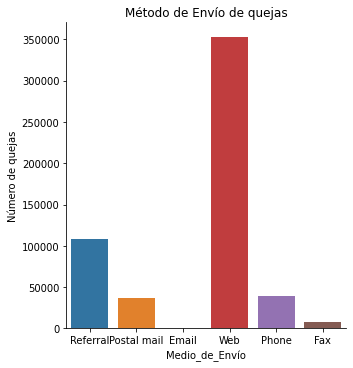

In [17]:
sns.catplot(x="Medio_de_Envío", kind="count", data=baselimp, aspect= 1)
plt.title("Método de Envío de quejas")
plt.ylabel("Número de quejas")
a=baselimp[baselimp['Medio_de_Envío'] == "Email"].count()
print("Email: %d" % (a[1]))

El método más usado para enviar quejas es la web. Hubo 292 registros enviados por Email, por lo que no es posible visualizar esta cantidad en la gráfica.

Closed without relief: 17799


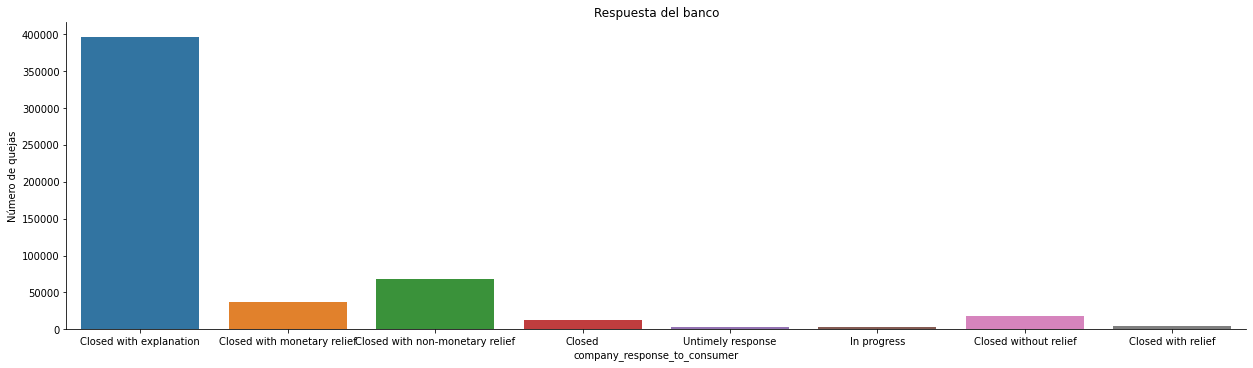

In [22]:
sns.catplot(x="company_response_to_consumer", kind="count", data=baselimp, aspect= 3.5)
plt.title("Respuesta del banco")
plt.ylabel("Número de quejas")
a=baselimp[baselimp['company_response_to_consumer'] == "Closed without relief"].count()
print("Closed without relief: %d" % (a[1]))

Se cerraron sin resolver 17,799 quejas de clientes (Closed without relief), y lo que se visualiza en la gráfica es la cuarta respuesta más común.

Yes: 530169
No: 13859


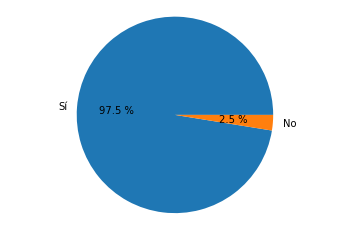

In [27]:
a=baselimp[baselimp['¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?'] == "Yes"].count()
print("Yes: %d" % (a[1]))
b=baselimp[baselimp['¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?'] == "No"].count()
print("No: %d" % (b[1]))

r = [a[1],b[1]]
nombres = ["Sí","No"]
plt.pie(r, labels=nombres,autopct="%0.1f %%")
plt.axis("equal")
plt.show()

El 97.5% de las quejas fueron resueltas a tiempo.

Yes: 109775
No: 434253


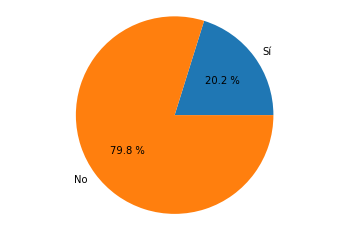

In [28]:
a=baselimp[baselimp['¿Cliente_sastifecho_a_la_solución?'] == "Yes"].count()
print("Yes: %d" % (a[1]))
b=baselimp[baselimp['¿Cliente_sastifecho_a_la_solución?'] == "No"].count()
print("No: %d" % (b[1]))

r = [a[1],b[1]]
nombres = ["Sí","No"]
plt.pie(r, labels=nombres,autopct="%0.1f %%")
plt.axis("equal")
plt.show()

El 20.2% no estuvieron sastifechos de la respuesta del banco.

# Base Secundaria

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Lectura de archivo
df = pd.read_csv("Suicides in India 2001-2012.csv",encoding='utf8')

Una vez importada la base, mostraremos la matriz de nuestra base de datos para analizar las columnas y nos deshacemos de los datos que consideramos irrelevantes al análisis. También cambiaremos los nombres de varias columnas para facilitar su entendimiento.

In [23]:
#Mostramos los primeros 5 datos de la base original
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


## Nota:
- No hay necesidad de quitar columnas.

In [24]:
#Cambiamos los nombres de las columnas
df = df.rename(columns = {'State':'Estado'})
df = df.rename(columns = {'Year':'Año'})
df = df.rename(columns = {'Type_code':'Categoría'})
df = df.rename(columns = {'Type':'Descripción'})
df = df.rename(columns = {'Gender':'Género'})
df = df.rename(columns = {'Age_group':'Rango Edad'})

df.head()

,Estado,Año,Categoría,Descripción,Género,Rango Edad,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


Ahora verificaremos si la columnas de la matriz muestra datos nulos.

In [25]:
df.isnull().any()

Estado         False
Año            False
Categoría      False
Descripción    False
Género         False
Rango Edad     False
Total          False
dtype: bool

Analizando el resultado anterior, podemos apreciar que no hay datos nulos en las columnas de la base de datos.

In [26]:
#Tamaño de la base primaria
df

,Estado,Año,Categoría,Descripción,Género,Rango Edad,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


En esta base de datos, existe una categoría que es la de "0-100+", este rango de edad consideras la cantidad de suicidios de 0 años hasta 100 años o más, por lo que quitaremos las filas con esta clasificación para solo basarnos por los rangos de edades de la vida diversificados.

In [27]:
a=df[df['Rango Edad'] == "0-100+"].count()
print("Cantidad de registros 0-100+: %d" % (a[1]))

Cantidad de registros 0-100+: 11856


Hay 11,856 registros de esta categoría, por lo que representa 4.99% de los registros de la base de datos, entonces consideramos esta cantidad como no significativa para nuestro estudio. Ahora, procedemos a eliminar estos registros:

In [28]:
df = df.drop(df[df['Rango Edad'] == "0-100+"].index)
df

,Estado,Año,Categoría,Descripción,Género,Rango Edad,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237504,West Bengal,2012,Professional_Profile,Farming/Agriculture Activity,Male,60+,0
237505,West Bengal,2012,Professional_Profile,Student,Male,60+,0
237506,West Bengal,2012,Professional_Profile,Service (Private),Male,60+,0
237507,West Bengal,2012,Professional_Profile,Professional Activity,Male,60+,0


# Estadística Básica

A continuación haremos uso de las funciones estadísticas básicas de python para explorar la base de datos. Seleccionaremos una categoría para realizar la técnica de visualización.

Primero, seleccionamos la categoría, que fue "Means_adopted" (Medios adaptados), y de ahí partimos a realizar una tabla de la suma de suicidios por tipo.

In [79]:
listasum,listaname=[],[]
tipo=df[(df['Categoría'] == "Means_adopted") & (df["Descripción"])]["Descripción"].unique().tolist()
s=len(tipo)
for i in range(s):
    a=df[(df['Categoría'] == "Means_adopted") & (df["Descripción"]==tipo[i])].sum()["Total"]
    listasum.append(a)
    listaname.append(tipo[i])

tabla = {'Nombre': listaname,'Suma de Suicidios' : listasum}
tabla = pd.DataFrame(tabla, columns = ['Nombre','Suma de Suicidios'])
tabla

,Nombre,Suma de Suicidios
0,By Consuming Insecticides,275501
1,By Hanging,460955
2,By Jumping from (Other sites),8127
3,By touching electric wires,10816
4,By Machine,1661
5,By Fire/Self Immolation,128006
6,By Jumping off Moving Vehicles/Trains,8116
7,By Other means (please specify),135132
8,By Self Infliction of injury,5093
9,By Over Alcoholism,15973


In [83]:
tabla.describe()

,Suma de Suicidios
count,17.000000
mean,85643.000000
std,128453.138226
min,1661.000000
25%,8116.000000
50%,10816.000000
75%,128006.000000
max,460955.000000


In [89]:
print("Suma Total: %d" % (tabla["Suma de Suicidios"].sum()))
print("Varianza: %f" % (tabla["Suma de Suicidios"].var()))
print("Curtósis: %f" % (tabla["Suma de Suicidios"].kurt()))
print("Sesgo: %f" % (tabla["Suma de Suicidios"].skew()))

Suma Total: 1455931
Varianza: 16500208720.000000
Curtósis: 3.689667
Sesgo: 1.947430


De los resultados anteriores, la media de suicidios es de 85,643; la cantidad mínima de suicidios de todas las causas de la categoría "Medios adoptados" fue de 1661 y el máximo fue de 460,955; la suma total de suicidios fue de 1,455,931; la variación de suicidios del año 2001 a 2012 es de 128,453; la curtósis es mayor a 3, esto representa que existe una gran concentración de los valores en torno a su media (Leptocúrtica); El sesgo es mayor que cero, por lo que tiene simetría positiva.

# Gráficas

Explicaremos el porqué no se puede graficar las siguientes variables de la base:
- Año: Columna de años.
- Descripción: Son miles de causas que complican la técnica de visualización.

Ahora haremos unas gráficas para analizar mejor nuestros registros de la base de datos.

Text(-14.950000000000031, 0.5, 'Número de suicidios')

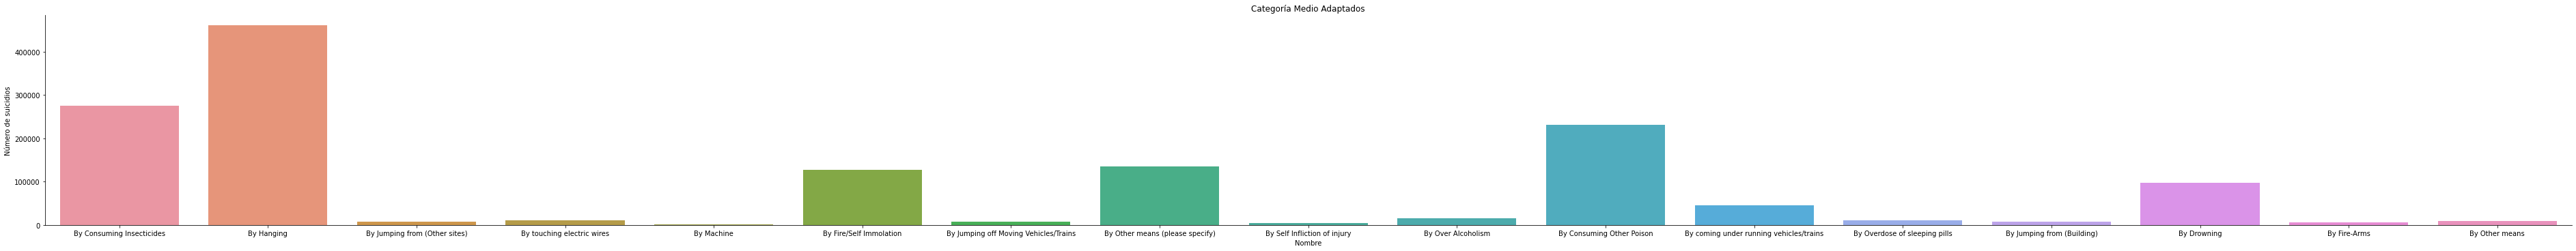

In [121]:
sns.catplot(x="Nombre",y="Suma de Suicidios", kind="bar", data=tabla, aspect= 10.5)
plt.title("Categoría Medio Adaptados")
plt.ylabel("Número de suicidios")

La mayores causas de suicidios de la categoría "Medios adaptados" fueron "By Hanging" (Colgado), "By Consuming Insecticides" (Consumo de Insecticidas) y "By Consuming Other Poisson" (Consumo de otro tipo de venenos)

Text(-15.074999999999974, 0.5, 'Número de suicidios')

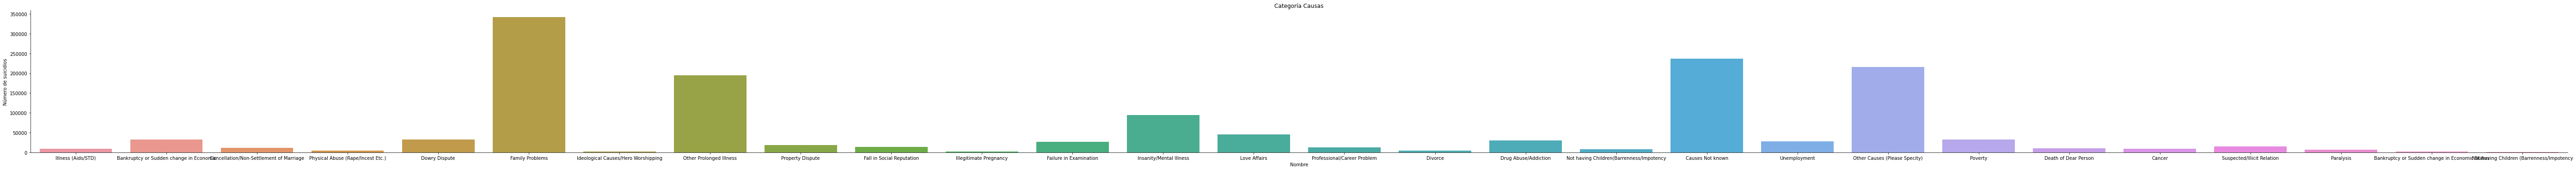

In [122]:
listasum1,listaname1=[],[]
tipo1=df[(df['Categoría'] == "Causes") & (df["Descripción"])]["Descripción"].unique().tolist()
s=len(tipo1)
for i in range(s):
    a=df[(df['Categoría'] == "Causes") & (df["Descripción"]==tipo1[i])].sum()["Total"]
    listasum1.append(a)
    listaname1.append(tipo1[i])

tabla1 = {'Nombre': listaname1,'Suma de Suicidios' : listasum1}
tabla1 = pd.DataFrame(tabla1, columns = ['Nombre','Suma de Suicidios'])

sns.catplot(x="Nombre",y="Suma de Suicidios", kind="bar", data=tabla1, aspect= 15.5)
plt.title("Categoría Causas")
plt.ylabel("Número de suicidios")

La mayor causa de suicidios en la categoría "Causes" (Causas) fue problemas familiares, y como consiguiente, causas no conocidas.

Text(-14.950000000000003, 0.5, 'Número de suicidios')

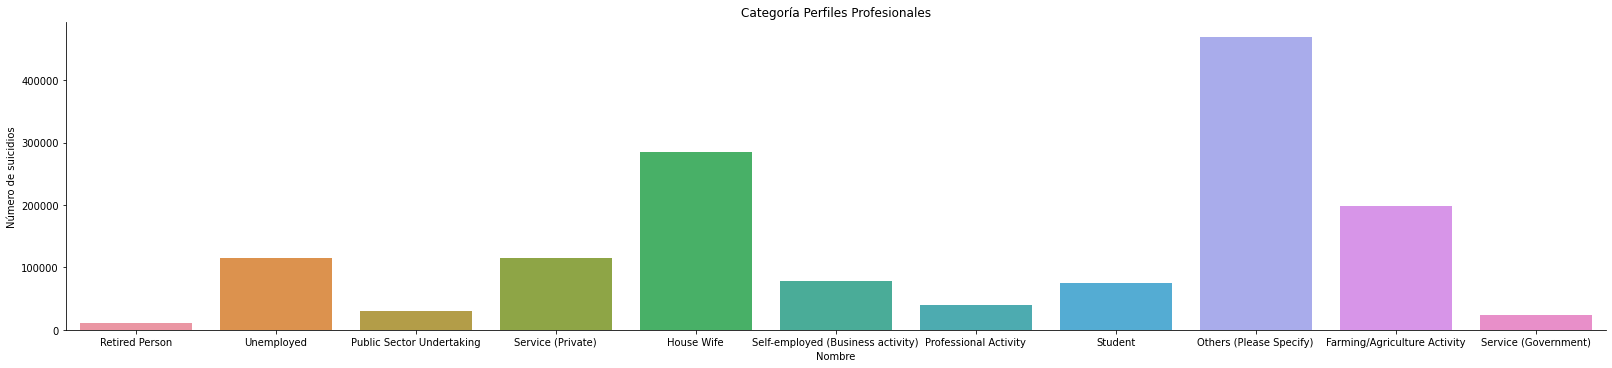

In [123]:
listasum1,listaname1=[],[]
tipo1=df[(df['Categoría'] == "Professional_Profile") & (df["Descripción"])]["Descripción"].unique().tolist()
s=len(tipo1)
for i in range(s):
    a=df[(df['Categoría'] == "Professional_Profile") & (df["Descripción"]==tipo1[i])].sum()["Total"]
    listasum1.append(a)
    listaname1.append(tipo1[i])

tabla2 = {'Nombre': listaname1,'Suma de Suicidios' : listasum1}
tabla2 = pd.DataFrame(tabla2, columns = ['Nombre','Suma de Suicidios'])
#tabla2
sns.catplot(x="Nombre",y="Suma de Suicidios", kind="bar", data=tabla2, aspect= 4.5)
plt.title("Categoría Perfiles Profesionales")
plt.ylabel("Número de suicidios")

La mayor causa conocida de los suicidios en la categoría "Professional_Profile" (Perfiles Profesionales) son las amas de casa, seguido de actividades Agrarias, Servicio Privado y Desempleados.

In [138]:
listasum1,listaname1=[],[]
tipo1=df["Año"].unique().tolist()
s=len(tipo1)
for i in range(s):
    a=df[df["Año"]==tipo1[i]].sum()["Total"]
    listasum1.append(a)
    listaname1.append(tipo1[i])

tabla3 = {'Año': listaname1,'Suma de Suicidios' : listasum1}
tabla3 = pd.DataFrame(tabla3, columns = ['Año','Suma de Suicidios'])

<AxesSubplot:xlabel='Año', ylabel='Density'>

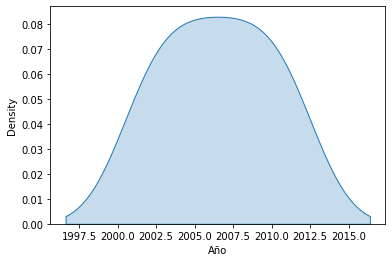

In [147]:
sns.kdeplot(data=tabla3, shade=True, x="Año",cut=2)

La gráfica anterior muestra que la mayor cantidad de suicidios se concentran del 2004 al 2008.